In [47]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('C:/Users/red7740/Desktop/SharkAttacks/shark_attack_data.csv',encoding='latin-1')
del data['Date.1']
del data['Activity.1']
del data['Area.1']
del data['Location.1']
del data['Fatal?.1']
del data['Incident Type.1']
del data['Unnamed: 0']
data['Country'] = 'USA'
#data.Activity.fillna('',inplace=True)
#data.Sex.fillna('',inplace=True)

In [48]:
#make an age set
data.Age.fillna(0,inplace=True) #NaN vals -> 0
ages = pd.DataFrame(data['Age'].value_counts()).reset_index()
ages.columns = ['Age','Count']
unknownage = ages.iloc[0]
ages = ages[1:] #remove unkown age
ages = ages.sort_values('Age').reset_index()
del ages['index']


In [74]:
ages['Age'] = ages['Age'].str.replace(r'(.{2})or.*', r'\1')
ages['Age'] = ages['Age'].str.replace(r'(.{2})&.*', r'\1')
ages['Age'] = ages['Age'].str.replace(r'(.{2})\'s', r'\1')
ages['Age'] = ages['Age'].str.replace(r'(.{2})s', r'\1')
ages['Age'] = ages['Age'].str.replace(r'(6)[^0-9]', r'\1')
cats = ages[80:]
ages = ages[:80]
age_bins = {'Child':0,'Teen':0,'Young Adult':0,'Adult':0,'Seniors':0}
for i in ages['Age']:
    if int(i) < 10: 
        age_bins['Child'] += 1
    elif int(i) < 18:
        age_bins['Teen'] += 1
    elif int(i) < 25:
        age_bins['Young Adult'] += 1
    elif int(i) < 65:
        age_bins['Adult'] += 1
    else:
        age_bins['Seniors'] += 1


In [50]:

age_bins['Unknown'] = unknownage['Count']

#hack for categorical data cleanup -- can't automate
age_bins['Child'] += 1
age_bins['Teen'] += 7
age_bins['Young Adult'] += 1
age_bins['Seniors'] += 1

In [51]:
age_bins

{'Adult': 44,
 'Child': 8,
 'Seniors': 11,
 'Teen': 17,
 'Unknown': 427,
 'Young Adult': 10}

In [52]:
#make Gender set
by_gender = data['Sex'].value_counts().to_dict()
by_gender

{'Female': 270, 'Male': 1348, 'Unknown': 37, 'lli': 1}

In [53]:
#make Activity set
by_activity = data['Activity'].value_counts().to_dict()

In [54]:
#make act/fatal set
fatal_by_activity = data[['Fatal?','Activity']]
isfat = list(fatal_by_activity[fatal_by_activity['Fatal?'] == 'Fatal']['Activity'])
notfat = fatal_by_activity[fatal_by_activity['Fatal?'] != 'Fatal']['Activity']

In [55]:
isfat_bins = ['Swimming','Boating', 'Fishing', 'Water Sports','Other']
fat_bin_counts = {b: 0 for b in isfat_bins}

for f in isfat:
    if 'Swim' in str(f) or 'bathing' in str(f) or 'Swim' in str(f) or 'Escaping' in str(f) or 'Tread' in str(f):
        fat_bin_counts['Swimming'] += 1
    elif 'surf' in str(f) or 'Surfing' in str(f) or 'div' in str(f) or 'board' in str(f) or 'Kite' in str(f) or 'ork' in str(f):
        fat_bin_counts['Water Sports'] += 1
    elif 'fish' in str(f) or 'Fish' in str(f) or 'crab' in str(f) or 'net' in str(f):
        fat_bin_counts['Fishing'] += 1
    elif 'boat' in str(f) or 'Boat' in str(f) or 'Vessel' in str(f) or 'Canoe' in str(f) or 'Kayak' in str(f) or 'overboard' in str(f) or 'capsized' in str(f) or 'Washed' in str(f):
        fat_bin_counts['Boating'] += 1
    else:
        fat_bin_counts['Other'] += 1

In [56]:
not_fat_bins = ['Swimming','Boating', 'Fishing', 'Water Sports','Other']
not_fat_bin_counts = {b: 0 for b in not_fat_bins}

for nf in notfat:
    if 'Swim' in str(nf) or 'bathing' in str(nf) or 'Swim' in str(nf) or 'Escaping' in str(nf) or 'Tread' in str(nf):
        not_fat_bin_counts['Swimming'] += 1
    elif 'surf' in str(nf) or 'Surfing' in str(nf) or 'div' in str(nf) or 'board' in str(nf) or 'Kite' in str(nf) or 'ork' in str(nf):
        not_fat_bin_counts['Water Sports'] += 1
    elif 'fish' in str(nf) or 'Fish' in str(nf) or 'crab' in str(nf) or 'net' in str(nf):
        not_fat_bin_counts['Fishing'] += 1
    elif 'boat' in str(nf) or 'Boat' in str(nf) or 'Vessel' in str(nf) or 'Canoe' in str(nf) or 'Kayak' in str(nf) or 'overboard' in str(nf) or 'capsized' in str(nf) or 'Washed' in str(nf):
        not_fat_bin_counts['Boating'] += 1
    else:
        not_fat_bin_counts['Other'] += 1

In [57]:
fatsum = len(isfat)  
notfatsum = len(notfat)

In [58]:
not_fat_bin_counts

{'Boating': 14,
 'Fishing': 113,
 'Other': 356,
 'Swimming': 267,
 'Water Sports': 763}

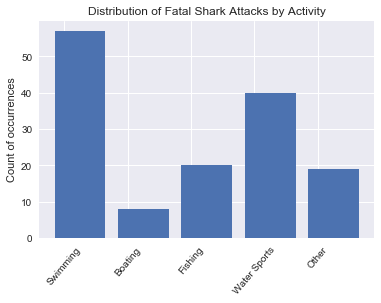

In [59]:
xvals = list(range(len(fat_bin_counts)))
labels = list(fat_bin_counts.keys())

import seaborn as sns
sns.set()

plt.bar(xvals,fat_bin_counts.values())
xticks_pos = [x - .25 for x in xvals]
plt.xticks(xticks_pos, labels, rotation='50')
plt.title('Distribution of Fatal Shark Attacks by Activity')
plt.ylabel('Count of occurrences')

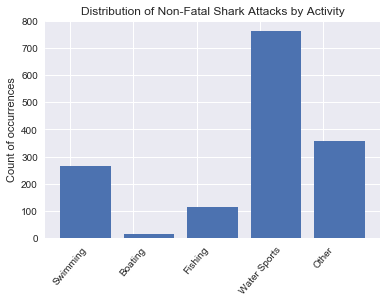

In [60]:
xvals = list(range(len(not_fat_bin_counts)))
labels = list(not_fat_bin_counts.keys())

import seaborn as sns
sns.set()

plt.bar(xvals,not_fat_bin_counts.values())
xticks_pos = [x - .25 for x in xvals]
plt.xticks(xticks_pos, labels, rotation='50')
plt.title('Distribution of Non-Fatal Shark Attacks by Activity')
plt.ylabel('Count of occurrences')

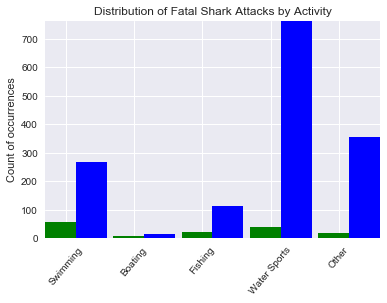

In [61]:
xvals = list(range(len(fat_bin_counts)))
x2vals = list(range(len(not_fat_bin_counts)))
labels = list(fat_bin_counts.keys())

import seaborn as sns
sns.set()
myplt = plt.subplot()
w=.45
plt.bar([x - w/2 for x in xvals],fat_bin_counts.values(), width=w, color='g', align='center')
plt.bar([x + w/2 for x in xvals], not_fat_bin_counts.values() , width=w, color='b', align='center')
xticks_pos = [x - .15 for x in xvals]
plt.xticks(xticks_pos, labels, rotation='50')
plt.title('Distribution of Fatal Shark Attacks by Activity')
plt.ylabel('Count of occurrences')
plt.autoscale(tight=True)
plt.show()

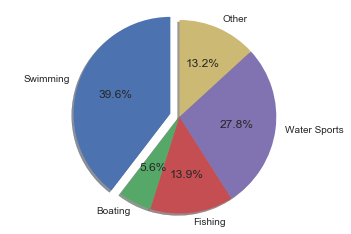

In [62]:
fatpievals = [f / fatsum for f in fat_bin_counts.values()]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Swimming')

fig1, ax1 = plt.subplots()
ax1.pie(fatpievals, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

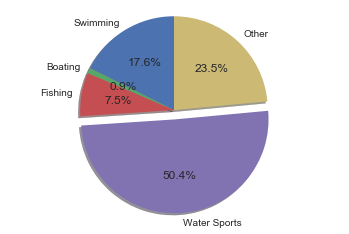

In [63]:
notfatpievals = [f / notfatsum for f in not_fat_bin_counts.values()]
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 1st slice (i.e. 'Swimming')

fig1, ax1 = plt.subplots()
ax1.pie(notfatpievals, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Container object of 6 artists>

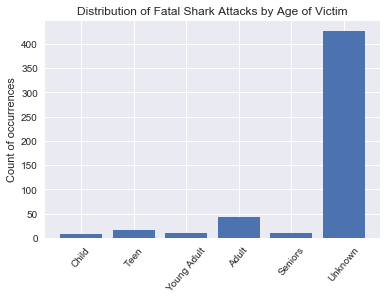

In [64]:
age_labels = list(age_bins.keys())
age_counts = age_bins.values()
xvals = list(range(6))
plt.xticks(xvals, age_labels, rotation='50')
plt.title('Distribution of Fatal Shark Attacks by Age of Victim')
plt.ylabel('Count of occurrences')
plt.bar(xvals, age_counts)

In [65]:
del age_bins['Unknown']

In [67]:
age_sum = sum(age_bins.values())

In [68]:
avales = []

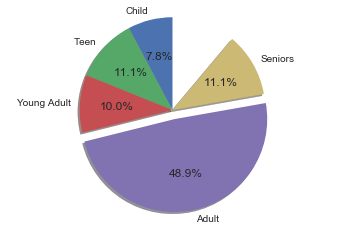

In [75]:
a_vals = [a / age_sum for a in age_bins.values()]
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 1st slice (i.e. 'Swimming')
alabels = list(age_bins.keys())
fig1, ax1 = plt.subplots()
ax1.pie(a_vals, explode=explode, labels=alabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()